In [ ]:
!pip install numpyro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.2/330.2 kB 5.8 MB/s eta 0:00:00


In [ ]:
import jax
import jax.numpy as jnp
import pandas as pd
from jax import random
# dsitributions
import numpyro
import numpyro.distributions as dist

from numpyro.infer import MCMC, NUTS, Predictive
from numpyro.diagnostics import hpdi
import arviz as az
import matplotlib.pyplot as plt

import numpy as np

# Since we are using jax, we will need a random key:
rng = jax.random.PRNGKey(42)

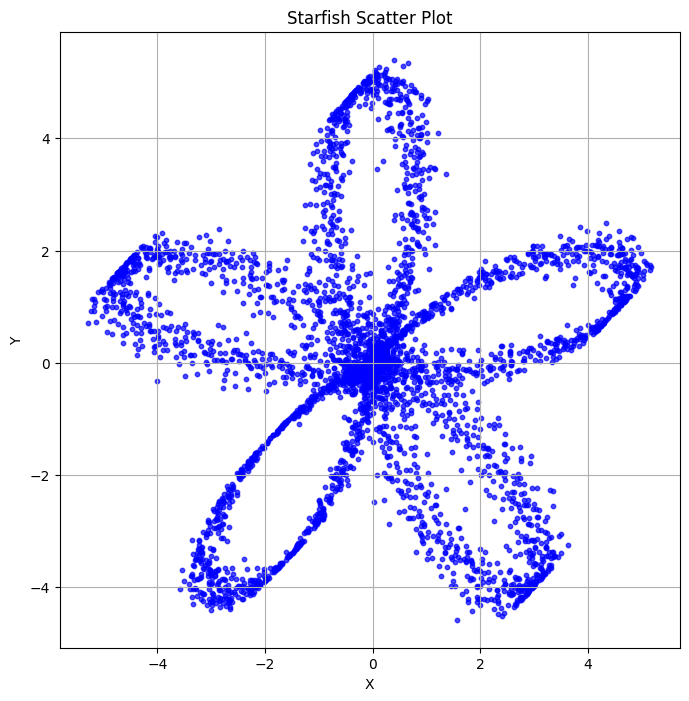

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for starfish scatter plot
num_points = 4000

# Define parameters for the starfish shape
theta = np.linspace(0, 2*np.pi, num_points)
r = 2.5 + 2.5* np.sin(5*theta)  # Adjust the coefficients to change the shape

# Convert polar coordinates to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Add noise to the data
noise = np.random.normal(scale=0.2, size=num_points)
x += noise
y += noise

# Plot the starfish scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=10, color='blue', alpha=0.7)
plt.title('Starfish Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


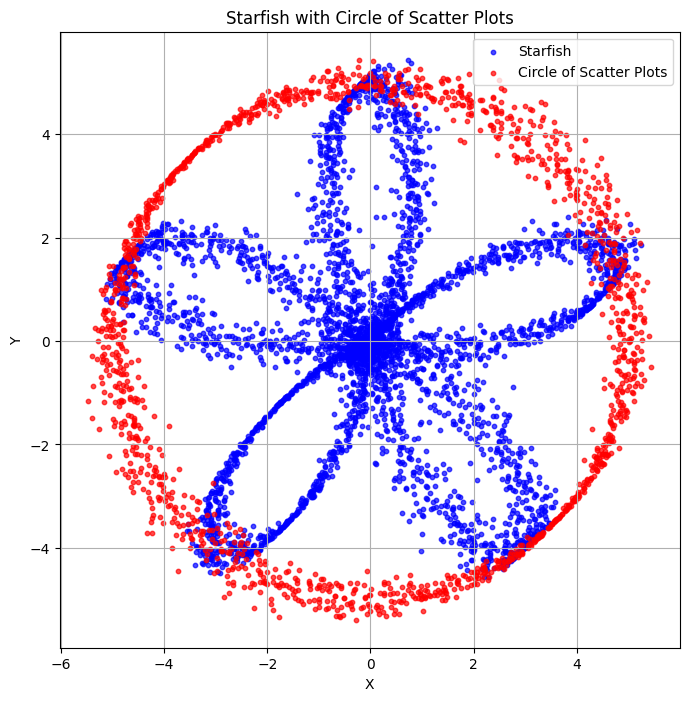

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for starfish scatter plot
num_points_starfish = 4000

# Define parameters for the starfish shape
theta_starfish = np.linspace(0, 2*np.pi, num_points_starfish)
r_starfish = 2.5 + 2.5 * np.sin(5*theta_starfish)  # Adjust the coefficients to change the shape

# Convert polar coordinates to Cartesian coordinates for starfish
x_starfish = r_starfish * np.cos(theta_starfish)
y_starfish = r_starfish * np.sin(theta_starfish)

# Add noise to the data
noise_starfish = np.random.normal(scale=0.2, size=num_points_starfish)
x_starfish += noise_starfish
y_starfish += noise_starfish

# Generate random data for the circle of scatter plots
num_points_circle = 1500
r_circle = 5
theta_circle = np.linspace(0, 2*np.pi, num_points_circle)

# Convert polar coordinates to Cartesian coordinates for circle
x_circle = r_circle * np.cos(theta_circle)
y_circle = r_circle * np.sin(theta_circle)

# Add noise to the data
noise_circle = np.random.normal(scale=0.2, size=num_points_circle)
x_circle += noise_circle
y_circle += noise_circle

# Plot the starfish scatter plot with the circle of scatter plots
plt.figure(figsize=(8, 8))
plt.scatter(x_starfish, y_starfish, s=10, color='blue', alpha=0.7, label='Starfish')

for i in range(num_points_circle):
    plt.scatter(x_circle[i], y_circle[i], s=10, color='red', alpha=0.7)

plt.title('Starfish with Circle of Scatter Plots')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Starfish', 'Circle of Scatter Plots'], loc='upper right')
plt.grid(True)
plt.axis('equal')
plt.show()

X=np.concatenate([x_starfish,x_circle ])
np.concatenate([y_starfish ,y_circle])

In [ ]:
X=np.concatenate([x_starfish,x_circle ] )


In [ ]:
Y=np.concatenate([y_starfish ,y_circle])

In [ ]:
Y.shape

(5500,)

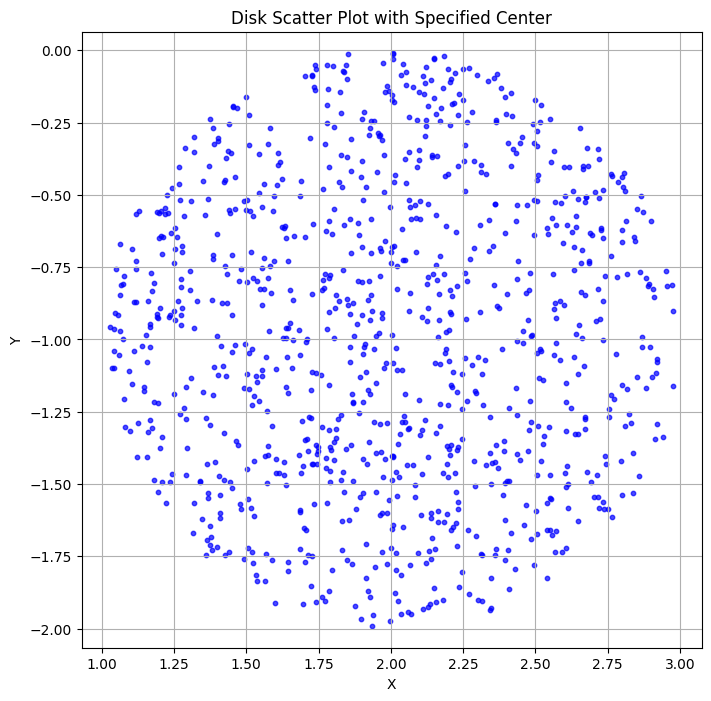

In [ ]:
# Generate random data for the disk scatter plot
num_points_disk = 1000

# Define parameters for the disk shape
r_disk = 1.0  # Radius of the disk
theta_disk = np.linspace(0, 2*np.pi, num_points_disk)

# Specify the center of the disk
center_x = 2.0
center_y = -1.0

# Generate random points within the disk
r_points = np.sqrt(np.random.uniform(0, r_disk**2, num_points_disk))
theta_points = np.random.uniform(0, 2*np.pi, num_points_disk)

# Convert polar coordinates to Cartesian coordinates for the disk points
x_disk = center_x + r_points * np.cos(theta_points)
y_disk = center_y + r_points * np.sin(theta_points)

# Plot the disk scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x_disk, y_disk, s=10, color='blue', alpha=0.7)
plt.title('Disk Scatter Plot with Specified Center')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.show()

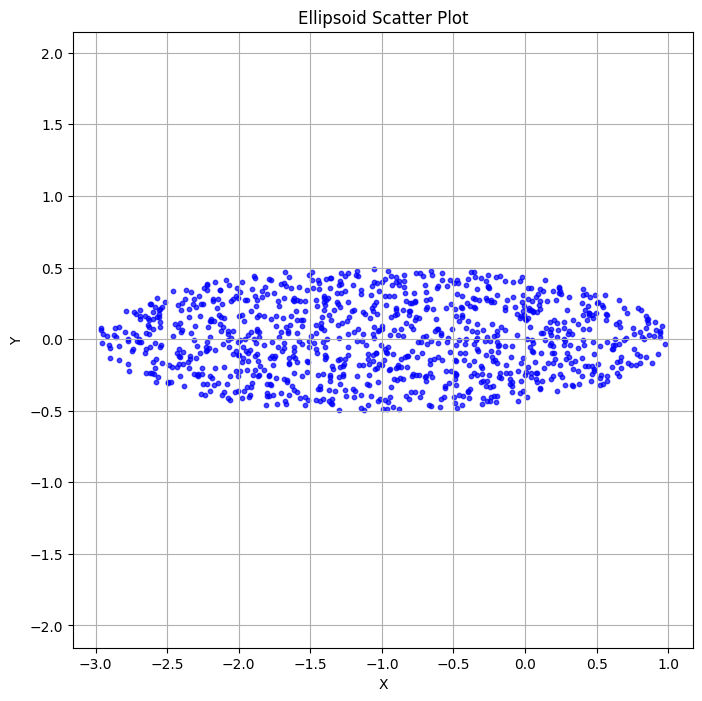

In [ ]:
num_points_ellipsoid = 1000

# Define parameters for the ellipsoid shape
a = 2.0  # Semi-major axis length
b = 0.5  # Semi-minor axis length
theta = np.linspace(0, 2 * np.pi, num_points_ellipsoid)

# Generate random points within the circular region
r = np.sqrt(np.random.uniform(0, 1, num_points_ellipsoid))

# Transform the coordinates to resemble an ellipsoid shape
x_ellipsoid = a * r * np.cos(theta)-1
y_ellipsoid = b * r * np.sin(theta)

# Plot the ellipsoid scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x_ellipsoid, y_ellipsoid, s=10, color='blue', alpha=0.7)
plt.title('Ellipsoid Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.show()

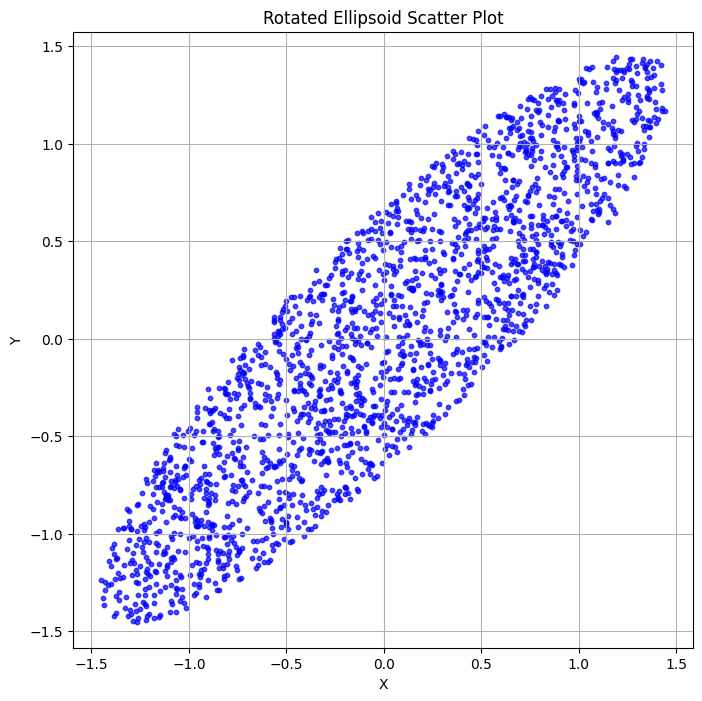

In [ ]:
# Generate random data for the ellipsoid scatter plot
num_points_ellipsoid = 2000

# Define parameters for the ellipsoid shape
a = 2.0  # Semi-major axis length
b = 0.5  # Semi-minor axis length
theta = np.linspace(0, 2 * np.pi, num_points_ellipsoid)

# Generate random points within the circular region
r = np.sqrt(np.random.uniform(0, 1, num_points_ellipsoid))

# Transform the coordinates to resemble an ellipsoid shape
x_ellipsoid = a * r * np.cos(theta)
y_ellipsoid = b * r * np.sin(theta)

# Define rotation angle (in radians)
rotation_angle = np.pi / 4  # Rotate by 45 degrees

# Define rotation matrix
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                            [np.sin(rotation_angle), np.cos(rotation_angle)]])

# Apply rotation to the coordinates
ellipsoid_coords = np.vstack((x_ellipsoid, y_ellipsoid))
rotated_coords = np.dot(rotation_matrix, ellipsoid_coords)

# Plot the rotated ellipsoid scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(rotated_coords[0], rotated_coords[1], s=10, color='blue', alpha=0.7)
plt.title('Rotated Ellipsoid Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.show()

<ipython-input-128-c4fdcd558f17>:34: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(np.random.normal(0, 0.4, num_points_ellipsoid))


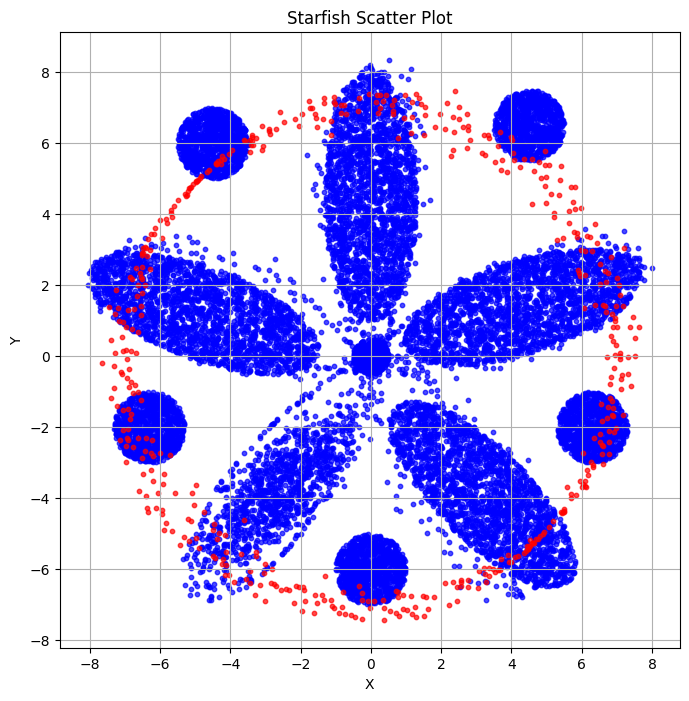

In [ ]:
#@title Artist


# Generate random data for starfish scatter plot
num_points = 1000

# Define parameters for the starfish shape
theta = np.linspace(0, 2*np.pi, num_points)
r = 4 + 4* np.sin(5*theta)  # Adjust the coefficients to change the shape

# Convert polar coordinates to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Add noise to the data
noise = np.random.normal(scale=0.2, size=num_points)
x += noise
y += noise




######################

# Generate random data for the ellipsoid scatter plot
num_points_ellipsoid = 2000

# Define parameters for the ellipsoid shape
a = 3.5  # Semi-major axis length
b = 1.3  # Semi-minor axis length
theta = np.linspace(0, 2 * np.pi, num_points_ellipsoid)

# Generate random points within the circular region
r = np.sqrt(np.random.normal(0, 0.4, num_points_ellipsoid))

# Transform the coordinates to resemble an ellipsoid shape
x_ellipsoid = a * r * np.cos(theta)-4.5
y_ellipsoid = b * r * np.sin(theta)-0.8

# Define rotation angle (in radians)
rotation_angle = np.pi / 4  # Rotate by 45 degrees

# Define rotation matrix
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                            [np.sin(rotation_angle), np.cos(rotation_angle)]])

# Apply rotation to the coordinates
ellipsoid_coords = np.vstack((x_ellipsoid, y_ellipsoid))
rotated_coords1 = np.dot(rotation_matrix, ellipsoid_coords)


######################################


# Generate random data for the ellipsoid scatter plot
num_points_ellipsoid = 2000

# Define parameters for the ellipsoid shape
a = 3.5  # Semi-major axis length
b = 1.3  # Semi-minor axis length
theta = np.linspace(0, 2 * np.pi, num_points_ellipsoid)

# Generate random points within the circular region
r = np.sqrt(np.random.uniform(0, 1, num_points_ellipsoid))

# Transform the coordinates to resemble an ellipsoid shape
x_ellipsoid = a * r * np.cos(theta)+4.5
y_ellipsoid = b * r * np.sin(theta)

# Define rotation angle (in radians)
rotation_angle = np.pi / 10# Rotate by 45 degrees

# Define rotation matrix
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                            [np.sin(rotation_angle), np.cos(rotation_angle)]])

# Apply rotation to the coordinates
ellipsoid_coords = np.vstack((x_ellipsoid, y_ellipsoid))
rotated_coords2 = np.dot(rotation_matrix, ellipsoid_coords)


########################################


# Generate random data for the ellipsoid scatter plot
num_points_ellipsoid = 2000

# Define parameters for the ellipsoid shape
a = 3.5  # Semi-major axis length
b = 1.3  # Semi-minor axis length
theta = np.linspace(0, 2 * np.pi, num_points_ellipsoid)

# Generate random points within the circular region
r = np.sqrt(np.random.uniform(0, 1, num_points_ellipsoid))

# Transform the coordinates to resemble an ellipsoid shape
x_ellipsoid = a * r * np.cos(theta)-4.9
y_ellipsoid = b * r * np.sin(theta)-0.5

# Define rotation angle (in radians)
rotation_angle = -np.pi /9# Rotate by 45 degrees

# Define rotation matrix
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                            [np.sin(rotation_angle), np.cos(rotation_angle)]])

# Apply rotation to the coordinates
ellipsoid_coords = np.vstack((x_ellipsoid, y_ellipsoid))
rotated_coords3 = np.dot(rotation_matrix, ellipsoid_coords)

##################################"

# Generate random data for the ellipsoid scatter plot
num_points_ellipsoid = 2000

# Define parameters for the ellipsoid shape
a = 3.5  # Semi-major axis length
b = 1.3  # Semi-minor axis length
theta = np.linspace(0, 2 * np.pi, num_points_ellipsoid)

# Generate random points within the circular region
r = np.sqrt(np.random.uniform(0, 1, num_points_ellipsoid))

# Transform the coordinates to resemble an ellipsoid shape
x_ellipsoid = a * r * np.cos(theta)+4.5
y_ellipsoid = b * r * np.sin(theta)

# Define rotation angle (in radians)
rotation_angle = np.pi /2# Rotate by 45 degrees

# Define rotation matrix
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                            [np.sin(rotation_angle), np.cos(rotation_angle)]])

# Apply rotation to the coordinates
ellipsoid_coords = np.vstack((x_ellipsoid, y_ellipsoid))
rotated_coords4 = np.dot(rotation_matrix, ellipsoid_coords)


# Generate random data for the ellipsoid scatter plot
num_points_ellipsoid = 2000

# Define parameters for the ellipsoid shape
a = 3.5  # Semi-major axis length
b = 1.3  # Semi-minor axis length
theta = np.linspace(0, 2 * np.pi, num_points_ellipsoid)

# Generate random points within the circular region
r = np.sqrt(np.random.uniform(0, 1, num_points_ellipsoid))

# Transform the coordinates to resemble an ellipsoid shape
x_ellipsoid = a * r * np.cos(theta)+5
y_ellipsoid = b * r * np.sin(theta)-0.5

# Define rotation angle (in radians)
rotation_angle = -np.pi /4# Rotate by 45 degrees

# Define rotation matrix
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                            [np.sin(rotation_angle), np.cos(rotation_angle)]])

# Apply rotation to the coordinates
ellipsoid_coords = np.vstack((x_ellipsoid, y_ellipsoid))
rotated_coords5= np.dot(rotation_matrix, ellipsoid_coords)

#################################################
# Generate random data for the disk scatter plot
num_points_disk = 1000

# Define parameters for the disk shape
r_disk = 1.0  # Radius of the disk
theta_disk = np.linspace(0, 2*np.pi, num_points_disk)

# Specify the center of the disk
center_x = 4.5
center_y = 6.5

# Generate random points within the disk
r_points = np.sqrt(np.random.uniform(0, r_disk**2, num_points_disk))
theta_points = np.random.uniform(0, 2*np.pi, num_points_disk)

# Convert polar coordinates to Cartesian coordinates for the disk points
x_disk = center_x + r_points * np.cos(theta_points)
y_disk = center_y + r_points * np.sin(theta_points)


###########################################################

# Generate random data for the disk scatter plot
num_points_disk = 1000

# Define parameters for the disk shape
r_disk = 1.0  # Radius of the disk
theta_disk = np.linspace(0, 2*np.pi, num_points_disk)

# Specify the center of the disk
center_x = -4.5
center_y = 6

# Generate random points within the disk
r_points = np.sqrt(np.random.uniform(0, r_disk**2, num_points_disk))
theta_points = np.random.uniform(0, 2*np.pi, num_points_disk)

# Convert polar coordinates to Cartesian coordinates for the disk points
x_disk1 = center_x + r_points * np.cos(theta_points)
y_disk1 = center_y + r_points * np.sin(theta_points)

##################################
# Generate random data for the disk scatter plot
num_points_disk = 1000

# Define parameters for the disk shape
r_disk = 1.0  # Radius of the disk
theta_disk = np.linspace(0, 2*np.pi, num_points_disk)

# Specify the center of the disk
center_x = -6.3
center_y = -2

# Generate random points within the disk
r_points = np.sqrt(np.random.uniform(0, r_disk**2, num_points_disk))
theta_points = np.random.uniform(0, 2*np.pi, num_points_disk)

# Convert polar coordinates to Cartesian coordinates for the disk points
x_disk2 = center_x + r_points * np.cos(theta_points)
y_disk2 = center_y + r_points * np.sin(theta_points)


############################

# Generate random data for the disk scatter plot
num_points_disk = 1000

# Define parameters for the disk shape
r_disk = 1.0  # Radius of the disk
theta_disk = np.linspace(0, 2*np.pi, num_points_disk)

# Specify the center of the disk
center_x = 6.3
center_y = -2

# Generate random points within the disk
r_points = np.sqrt(np.random.uniform(0, r_disk**2, num_points_disk))
theta_points = np.random.uniform(0, 2*np.pi, num_points_disk)

# Convert polar coordinates to Cartesian coordinates for the disk points
x_disk3 = center_x + r_points * np.cos(theta_points)
y_disk3 = center_y + r_points * np.sin(theta_points)

#################################

# Generate random data for the disk scatter plot
num_points_disk = 1000

# Define parameters for the disk shape
r_disk = 1.0  # Radius of the disk
theta_disk = np.linspace(0, 2*np.pi, num_points_disk)

# Specify the center of the disk
center_x = 0
center_y = -6

# Generate random points within the disk
r_points = np.sqrt(np.random.uniform(0, r_disk**2, num_points_disk))
theta_points = np.random.uniform(0, 2*np.pi, num_points_disk)

# Convert polar coordinates to Cartesian coordinates for the disk points
x_disk4 = center_x + r_points * np.cos(theta_points)
y_disk4 = center_y + r_points * np.sin(theta_points)

#############################
# Generate random data for the disk scatter plot
num_points_disk = 500

# Define parameters for the disk shape
r_disk = 0.5  # Radius of the disk
theta_disk = np.linspace(0, 2*np.pi, num_points_disk)

# Specify the center of the disk
center_x = 0
center_y = 0

# Generate random points within the disk
r_points = np.sqrt(np.random.uniform(0, r_disk**2, num_points_disk))
theta_points = np.random.uniform(0, 2*np.pi, num_points_disk)

# Convert polar coordinates to Cartesian coordinates for the disk points
x_disk5 = center_x + r_points * np.cos(theta_points)
y_disk5= center_y + r_points * np.sin(theta_points)

#############################################################


# Generate random data for the circle of scatter plots
num_points_circle = 500
r_circle = 7
theta_circle = np.linspace(0, 2*np.pi, num_points_circle)

# Convert polar coordinates to Cartesian coordinates for circle
x_circle = r_circle * np.cos(theta_circle)
y_circle = r_circle * np.sin(theta_circle)

# Add noise to the data
noise_circle = np.random.normal(scale=0.3, size=num_points_circle)
x_circle += noise_circle
y_circle += noise_circle


# Plot the starfish scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=10, color='blue', alpha=0.7)
# Plot the rotated ellipsoid scatter plo
plt.scatter(rotated_coords1[0], rotated_coords1[1], s=10, color='blue', alpha=0.7)
plt.scatter(rotated_coords2[0], rotated_coords2[1], s=10, color='blue', alpha=0.7)
plt.scatter(rotated_coords3[0], rotated_coords3[1], s=10, color='blue', alpha=0.7)
plt.scatter(rotated_coords4[0], rotated_coords4[1], s=10, color='blue', alpha=0.7)
plt.scatter(rotated_coords5[0], rotated_coords5[1], s=10, color='blue', alpha=0.7)
plt.scatter(x_disk, y_disk, s=10, color='blue', alpha=0.7)
plt.scatter(x_disk1, y_disk1, s=10, color='blue', alpha=0.7)
plt.scatter(x_disk2, y_disk2, s=10, color='blue', alpha=0.7)
plt.scatter(x_disk3, y_disk3, s=10, color='blue', alpha=0.7)
plt.scatter(x_disk4, y_disk4, s=10, color='blue', alpha=0.7)
plt.scatter(x_disk5, y_disk5, s=10, color='blue', alpha=0.7)
plt.scatter(x_circle, y_circle, s=10, color='red', alpha=0.7)
plt.title('Starfish Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [ ]:
a=np.concatenate([x,rotated_coords1[0],rotated_coords2[0],rotated_coords2[0],rotated_coords3[0],rotated_coords4[0],rotated_coords5[0],x_disk,x_disk1,x_disk2,x_disk3,x_disk4,x_disk5,x_circle])

In [ ]:
b=np.concatenate([y,rotated_coords1[1],rotated_coords2[1],rotated_coords2[1],rotated_coords3[1],rotated_coords4[1],rotated_coords5[1],y_disk,y_disk1,y_disk2,y_disk3,y_disk4,y_disk5,y_circle])
